In [1]:
import pandas as pd
train_df = pd.read_parquet("data/comscore_recruitment_202206_data/train_data.parquet")
train_df.head()

,brand_id,post_content,platform
0,9b39285ec9cf47baaa51d1ea18eec8cc,#LoSéTodo La violación a la intimidad tiene co...,FB
1,18cbba7c95b741e9bb477778c5cce568,Whoopi Goldberg apologizes after saying the Ho...,FB
2,a63ceb8f478e43938416f2a9a1c5bacd,Nochevieja se llama Hogmanay en Escocia y la m...,TW
3,acbba767a3854bd3b324da5a1c896fe6,Kiss my to welcome in the New Years and finger...,TW
4,0dc1b14b735e47c5861dc8238bb218e0,— Hiding in plain sight on a dusty corner of t...,FB


In [2]:
train_df[["brand_id", "platform"]].describe()

,brand_id,platform
count,77873,77873
unique,25881,2
top,2bc1167da7414fada27ec5e69f0187a6,TW
freq,621,40000


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77873 entries, 0 to 77872
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand_id      77873 non-null  object
 1   post_content  77873 non-null  object
 2   platform      77873 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


In [4]:
train_df["post_len"] = train_df["post_content"].apply(len)
train_df["post_len"].describe()

count    77873.000000
mean       147.116960
std        227.143076
min          0.000000
25%         67.000000
50%        109.000000
75%        173.000000
max      13385.000000
Name: post_len, dtype: float64

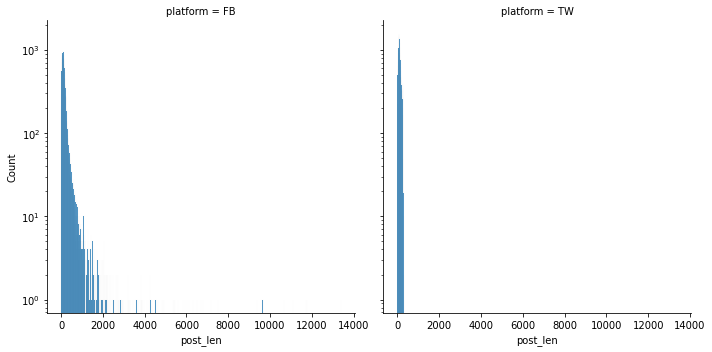

In [5]:
import seaborn as sns
sns.displot(data=train_df, x="post_len", col="platform", log_scale=(False, True))

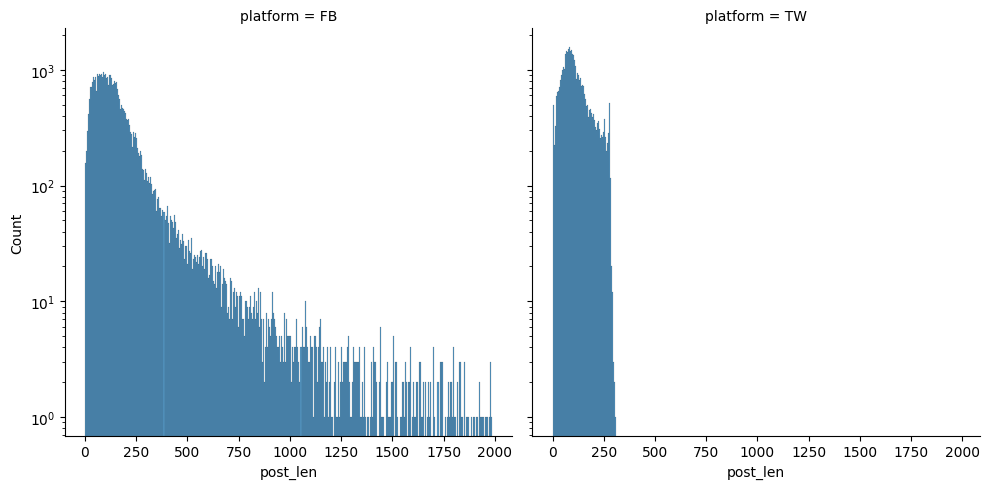

In [6]:
sns.displot(data=train_df[train_df["post_len"] <= 2000], x="post_len", col="platform", log_scale=(False, True))

In [7]:
import re
train_df["word_count"] = train_df["post_content"].apply(lambda x: len(re.sub("\n", " ", x).split()))
train_df["word_count"].describe()

count    77873.000000
mean        22.743852
std         35.727069
min          0.000000
25%         10.000000
50%         17.000000
75%         27.000000
max       2601.000000
Name: word_count, dtype: float64

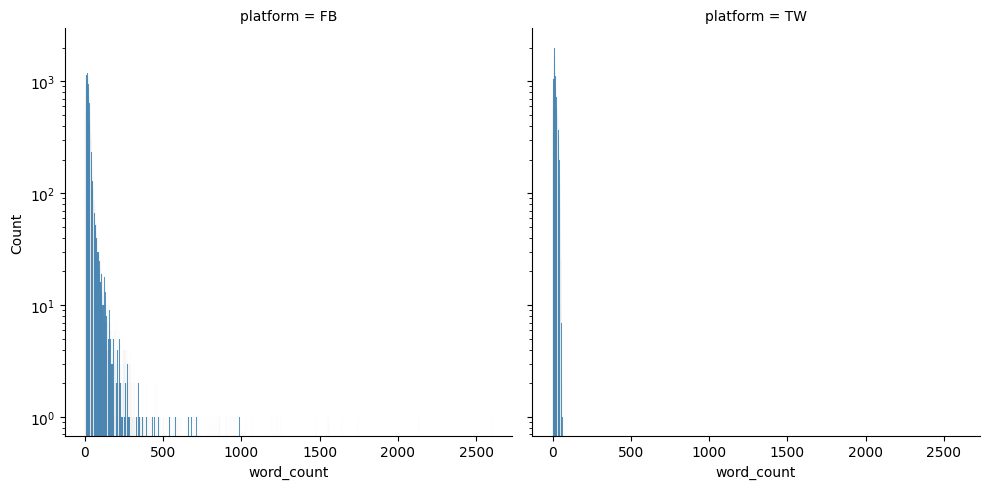

In [8]:
sns.displot(data=train_df, x="word_count", col="platform", log_scale=(False, True))

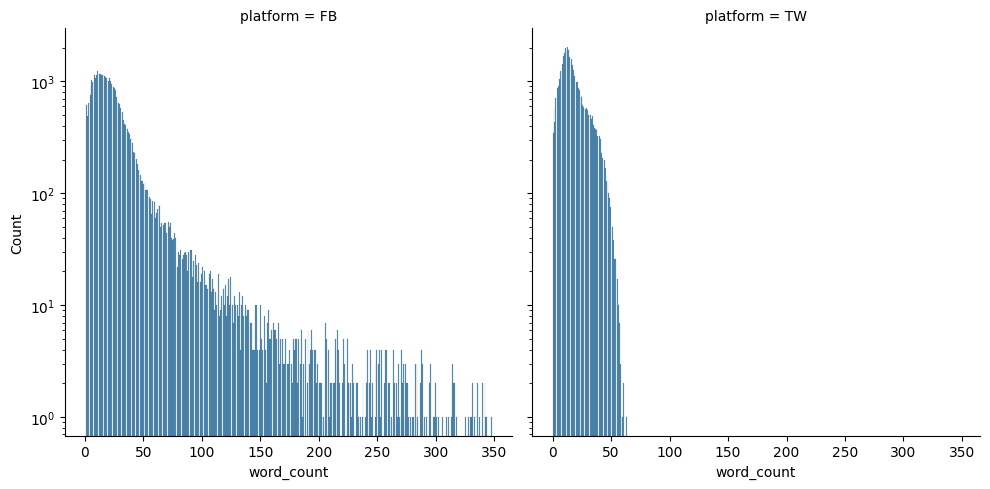

In [9]:
sns.displot(data=train_df[train_df["word_count"] <= 350], x="word_count", col="platform", log_scale=(False, True))

In [10]:
from langdetect import detect, LangDetectException, DetectorFactory

def detect_lang(txt):
    DetectorFactory.seed = 42
    try:
        lang = detect(txt)
    except LangDetectException:
        lang = "unknown"
    return lang

train_df["lang"] = train_df["post_content"].apply(detect_lang)

<AxesSubplot:>

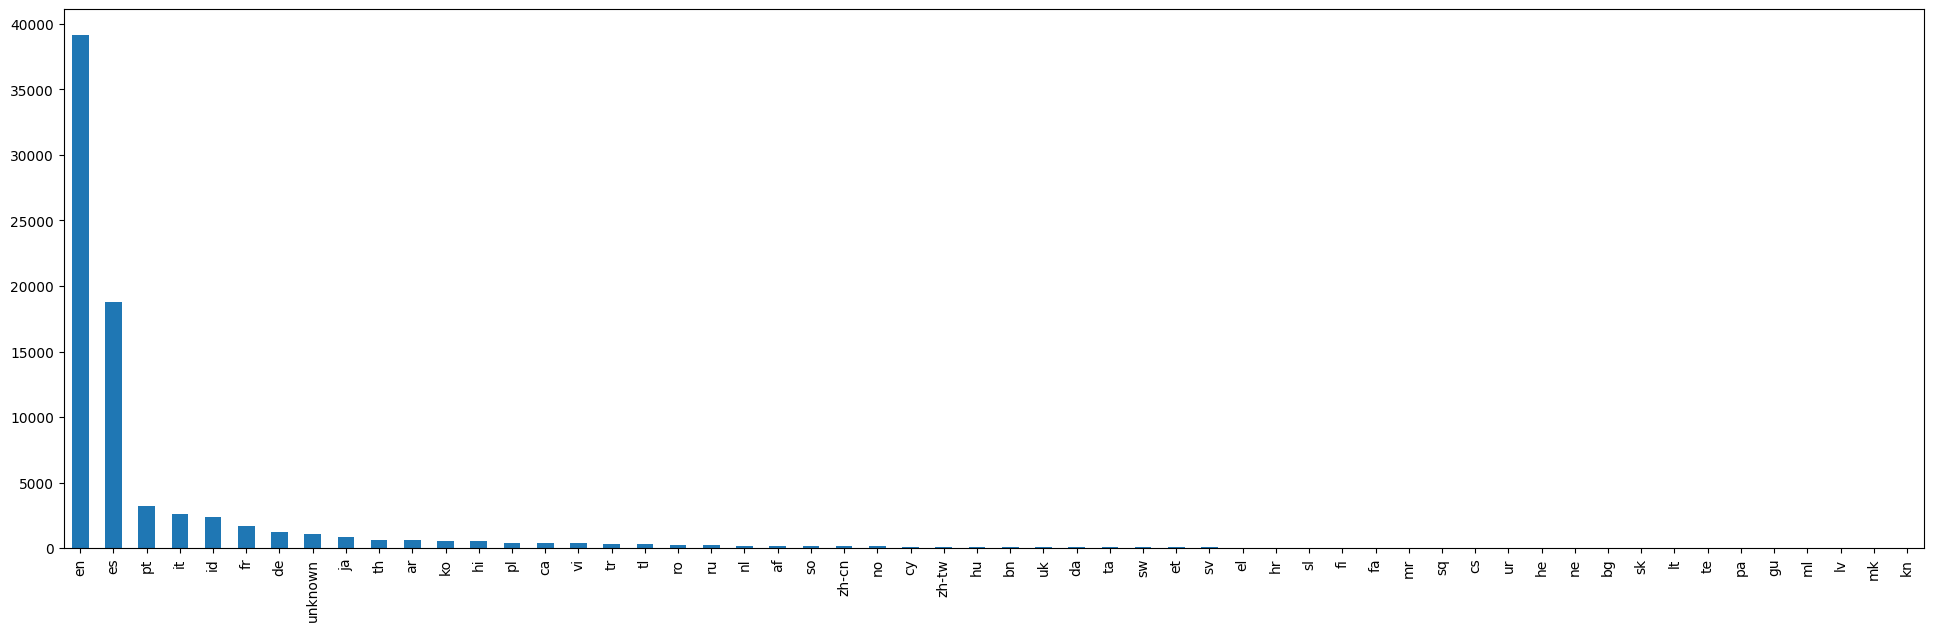

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 7))
train_df["lang"].value_counts().plot.bar()

<AxesSubplot:>

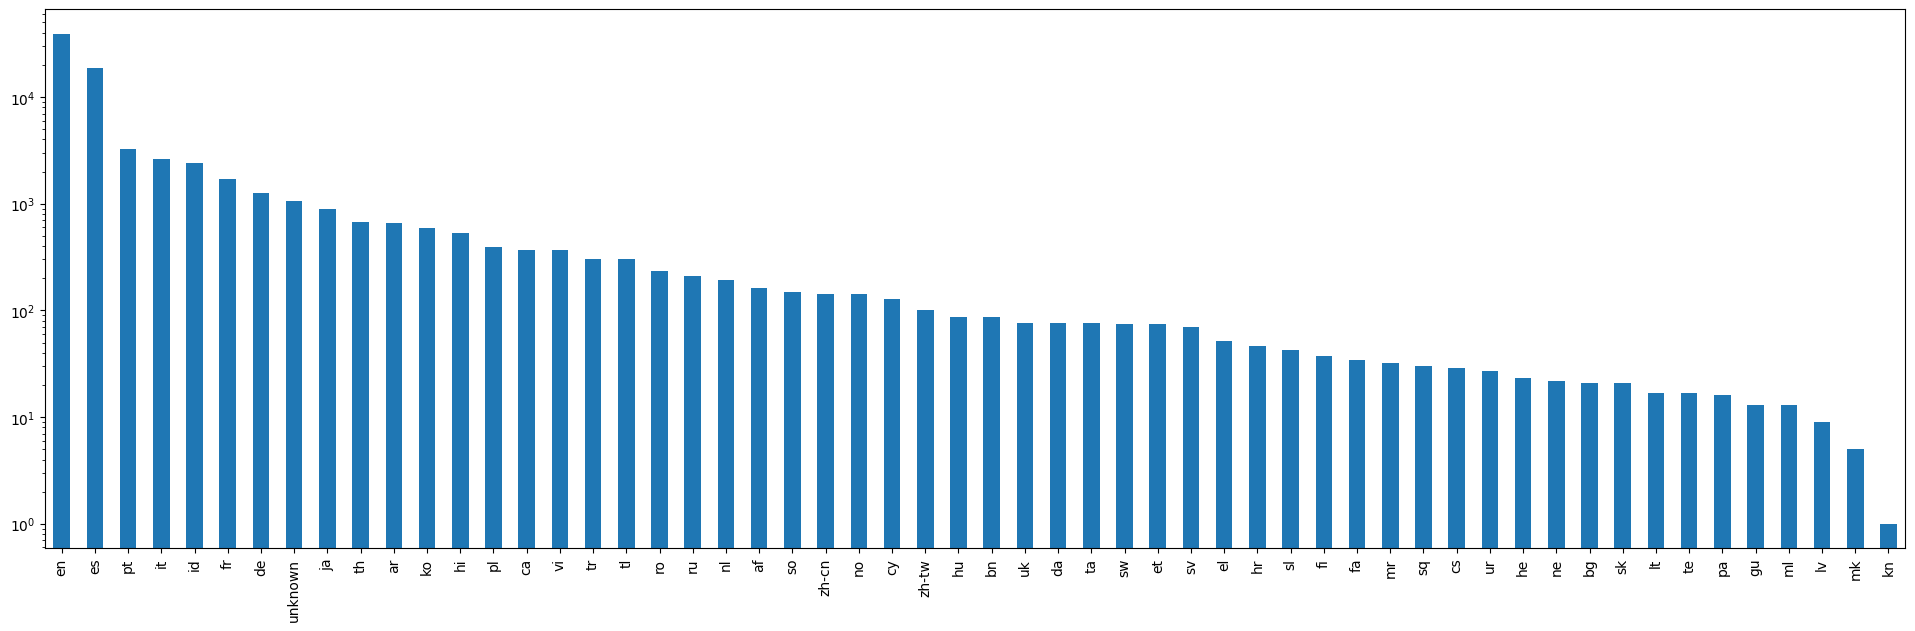

In [12]:
plt.figure(figsize=(24, 7))
train_df["lang"].value_counts().plot.bar(logy=True)

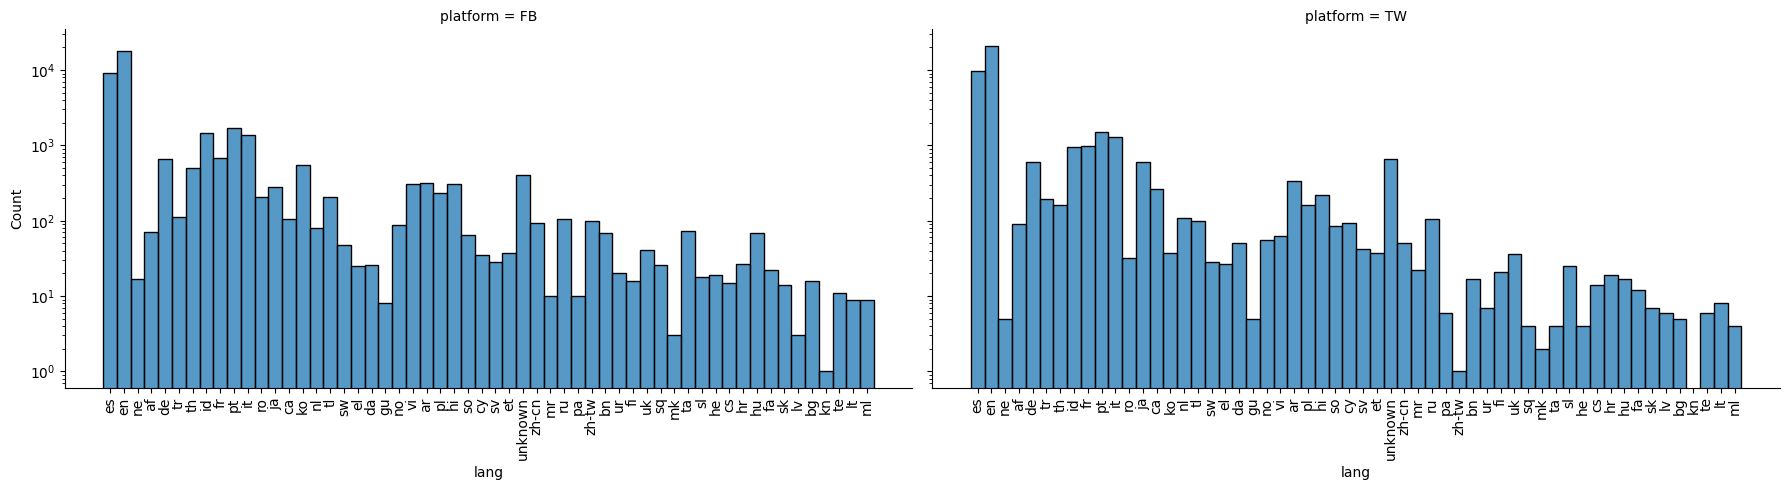

In [13]:
d = sns.displot(
    data=train_df,
    x="lang",
    col="platform",
    height=5,
    aspect=9 / 5,
    log_scale=(False, True),
)
d.set_xticklabels(rotation=90)
d.tight_layout()

In [18]:
val_df = pd.read_parquet("data/comscore_recruitment_202206_data/val_data_post_content.parquet")
val_df["platform"] = pd.read_parquet("data/comscore_recruitment_202206_data/val_data_platform.parquet")["platform"]

In [19]:
val_df.head()

,post_content,platform
0,Coronilla de la Divina Misericordia - Un nuevo...,FB
1,Thornton’s Furniture saw significant damage on...,TW
2,GAGNEZ vos places pour le Top Music Live ! 🤩\n...,FB
3,More headaches for renters as landlords flee t...,TW
4,"👏 Con mucha emoción, se realizó el cierre del ...",TW


<AxesSubplot:>

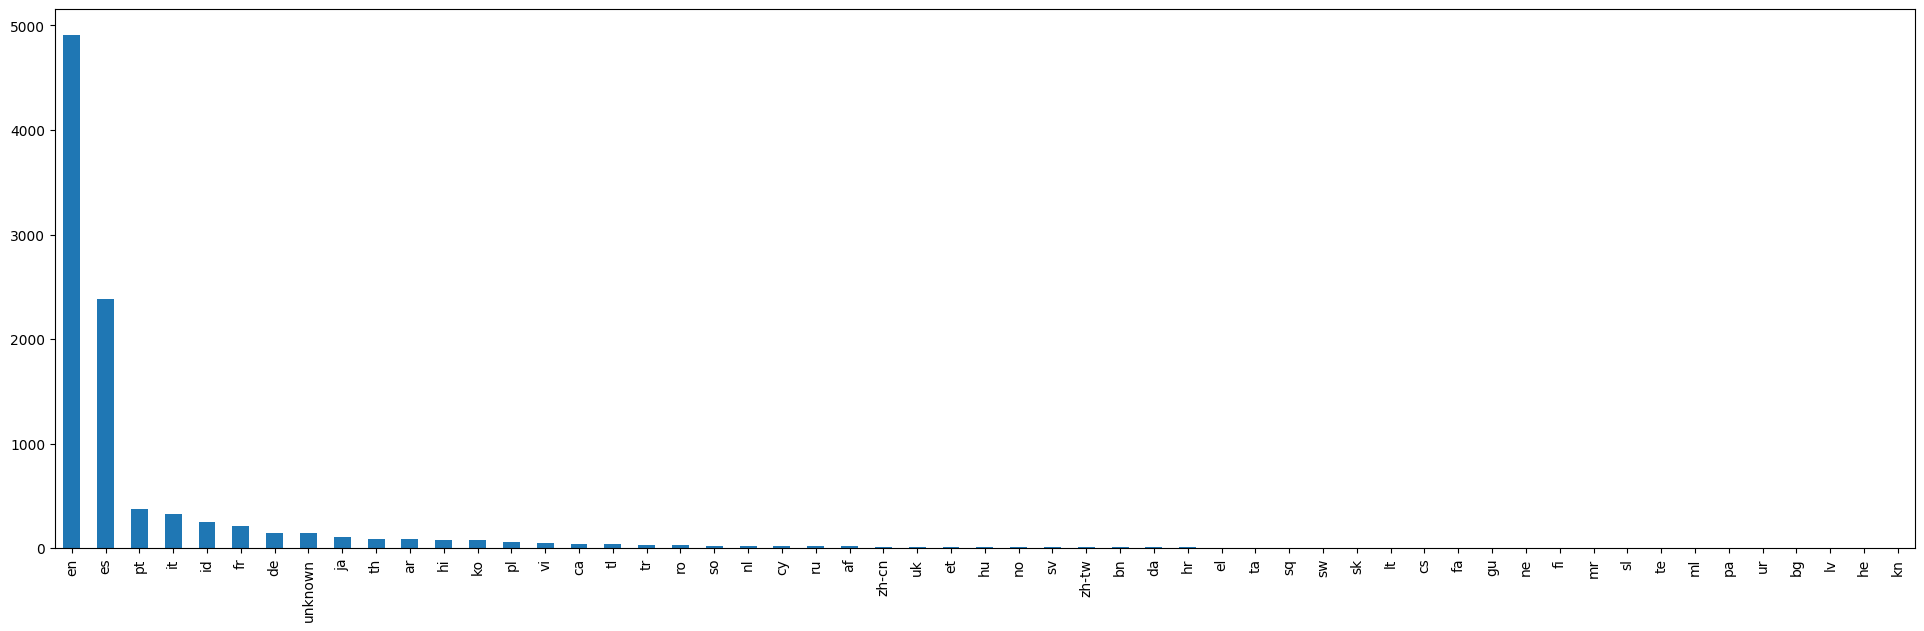

In [20]:
val_df["lang"] = val_df["post_content"].apply(detect_lang)
plt.figure(figsize=(24, 7))
val_df["lang"].value_counts().plot.bar()